## ***Random Sample Imputation***
It is similar to mean/ median/ mode imputation but it works by taking random observations from the dataset to fill the **NAN** values.</br>
This technique is used when data is **Missing Completely at Random***(MCAR).

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
# Let's check how we gonna create random values to fill
# for example let's take AGE column and we will use .sample() for sampling at random
# everytime we execute .sample(), it will pick a random value from the given column
print(data.Age.dropna().sample())
print(data.Age.dropna().sample())
print(data.Age.dropna().sample())
print(data.Age.dropna().sample())
print("===========================================================")
# we can use .sample() with some condition
data.Age.dropna().sample(n=data.Age.isnull().sum(),random_state=0) # data.Age.isnull().sum() is used to get the number of missing values in the column

445    4.0
Name: Age, dtype: float64
165    9.0
Name: Age, dtype: float64
68    17.0
Name: Age, dtype: float64
850    4.0
Name: Age, dtype: float64


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
# This will give us the index of AGE column where the missing values are
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [8]:
# Let's create a function by which we will replace NAN values with random observation values
# and we will compare the results with mean/ median/ mode imputation technique.

def impute_nan(data,variable,method):
    if method == 'mean':
        data[variable+"_mean"] = data[variable].fillna(data[variable].mean())
    elif method == 'median':
        data[variable+"_median"] = data[variable].fillna(data[variable].median())
    elif method == 'mode':
        data[variable+"_mode"] = data[variable].fillna(data[variable].mode())
    elif method == 'random':
        data[variable+"_random"] = data[variable]
        # It will have the random sample to fill the NA values
        random_sample = data[variable].dropna().sample(n=data[variable].isnull().sum(),random_state=0)
        # pandas need to have same index in order to merge the dataset
        random_sample.index = data[data[variable].isnull()].index
        data.loc[random_sample.index,variable+"_random"] = random_sample # loc is used to get the index of the dataset and assign the random sample to the column


In [9]:
impute_nan(data,'Age','median')
impute_nan(data,'Age','random')

In [10]:
data.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [31]:
# Let's check the change in standard deviation of AGE after imputation and compare it with the original standard deviation and as well as with Age_median
print(data.Age.std())
print(data.Age_median.std())
print(data.Age_random.std())

14.526497332334042
13.019696550973201
14.56365408956869


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

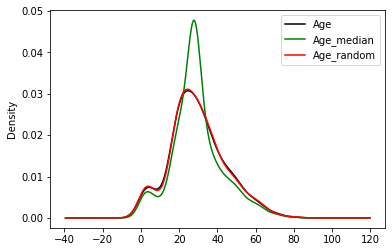

In [30]:
# now let's plot the Age, Age_median and Age_random columns to see the difference between the distribution

fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax,color='black')
data['Age_median'].plot(kind='kde',ax=ax,color='green')
data['Age_random'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Here we can see that the distribution of Age_random is almost similar to the original data where as the distribution of Age_median is somewhat changed.

### Advantages and Disadvantages of Random Sample Imputation

***Advantages***
1. Easy to implement
2. There is less distortion in variance as compared to mean/ median/ mode imputation.

***Disadvantages***
1. In every situation randomness won't work as expected.

## ***Capturing NAN values with a new feature***
It works well if the data is **Missing Not At Random** (MNAR).

In [32]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [34]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [35]:
# Here we are creating a new feature in which where-ever the Age is missing, we will assign 1 ortherwise 0
data['Age_NAN'] = np.where(data['Age'].isnull(),1,0)

In [36]:
data.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [37]:
# Now we can replace NAN values in the Age column with some values like mean, median
#  and the importance of the missing values are captured in the Age_NAN column i.e. in New Feature
#  now whenever we try to train our model with this dataset, out model will get to know which values were missing and what's there importance is
data.Age.fillna(data.Age.median(),inplace=True)

In [39]:
data.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages and Disadvantages of Capturing NAN values with a new feature

***Advantages***
1. It captures the importance of missing values.

***Disadvantages***
1. Suppose we are having 10 features which have NAN values and we try to use this technique then 10 additional features get created which may leads it to **CURSE OF DIMENSIONALITY**.

## ***End of Distribution Imputation***
It works well if the data is **Missing Not At Random** (MNAR).
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable</br>
By using end of distribution we can capture the outliers.

In [40]:
 data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

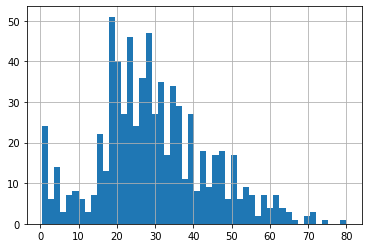

In [44]:
data.Age.hist(bins=50)

Here we can see our data doesn't have left side outlier. We only have the right side outliers.

In [45]:
data.Age.mean() # here the mean is the central value 

29.69911764705882

If we want to take the values of far end of the distribution it means that we are going to take values after the third standard deviation.

In [49]:
# Picking up the values after the 3rd standard deviation
data.Age.mean() + 3*data.Age.std()

73.27860964406094

<AxesSubplot:xlabel='Age'>

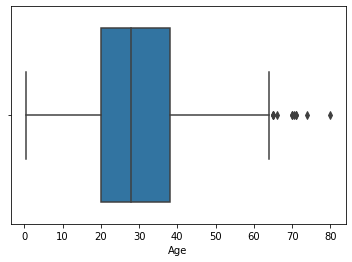

In [47]:
# Checking the outliers in Age column
# data[data.Age > data.Age.mean() + 3*data.Age.std()]
import seaborn as sns
sns.boxplot(x='Age',data=data)

In [51]:
# Creating impute function for filling NAN values
def impute_nan(data,variable,method):
    if method == "end_distribution":
        data[variable+"_"+method] = data[variable].fillna(data[variable].mean() + 3*data[variable].std())
    elif method == "mean":
        data[variable+"_"+method] = data[variable].fillna(data[variable].mean())
    elif method == "median":
        data[variable+"_"+method] = data[variable].fillna(data[variable].median())
    elif method == "mode":
        data[variable+"_"+method] = data[variable].fillna(data[variable].mode())
    elif method == "random":
        data[variable+"_"+method] = data[variable]
        random_sample = data[variable].dropna().sample(n=data[variable].isnull().sum(),random_state=0)
        random_sample.index = data[data[variable].isnull()].index
        data.loc[random_sample.index,variable+"_"+method] = random_sample

In [52]:
impute_nan(data,'Age','median')
impute_nan(data,'Age','end_distribution')

In [53]:
data.head(10)

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
5,0,NaN,8.4583,28.0,73.27861
6,0,54.0,51.8625,54.0,54.00000
7,0,2.0,21.0750,2.0,2.00000
8,1,27.0,11.1333,27.0,27.00000
9,1,14.0,30.0708,14.0,14.00000


<AxesSubplot:>

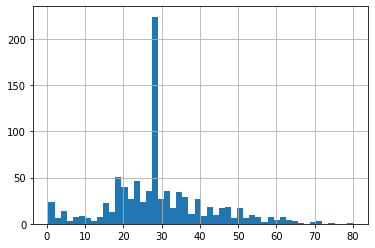

In [54]:
# Let's see histogram of Age_median
data.Age_median.hist(bins=50)

Since we replace all NAN values with median therefore, we are getting variance. There is the large distortion in variance.

<AxesSubplot:>

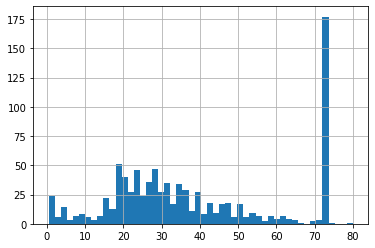

In [55]:
# Let's see the histogram of Age_end_distribution
data.Age_end_distribution.hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

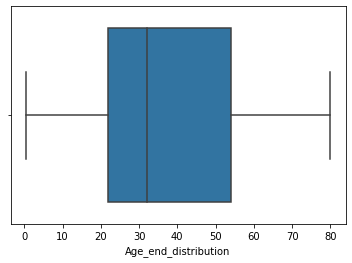

In [56]:
sns.boxplot(x='Age_end_distribution',data=data)

Now here we can see that the outliers present before are not here now.</br>
Additionally, now our data is also right skewed.

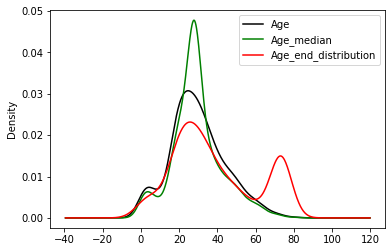

In [57]:
# Let's plot the original Age, Age_median and Age_end_distribution

fig = plt.figure()
ax=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax,color='black')
data['Age_median'].plot(kind='kde',ax=ax,color='green')
data['Age_end_distribution'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of End of Distribution Imputation

***Advantages***
1. It is quick.
2. captures the importance of missing values (if one suspects the missing data is valuable).

***Disadvantages***
1. It may distort the variable distribution, mask predictive power if missingness is not important.
2. It hide true outliers if the missing data is large or create a unintended outliers is NAN values are small.